# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Aqil Alhafizh
- **Email:** m471bsy0372@bangkit.academy
- **ID Dicoding:** aqil123

## Menentukan Pertanyaan Bisnis

- Apakah cuaca berpengaruh terdahap jumlah penyewa sepeda?
- Bagaimana korelasi antara variabel cuaca seperti suhu, kelembaban, kecepatan angin dengan jumlah penyewaan sepeda?
- Apakah terdapat perbedaan pola penyewaan sepeda antara musim semi, musim panas, musim gugur, dan musim dingin?

## Import Semua Packages/Library yang Digunakan

In [87]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Di sini kita akan meng **import data csv** yang sudah di download yaitu **day.csv** dan **hour.csv**

In [88]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [89]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

1. Cek Tipe Data dari kedua dataset tersebut

In [90]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [91]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Karena dteday adalah tanggal maka harus kita konversi menjadi tipe data datetime

2. Cek Missing Value

In [92]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [93]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value

3. Cek Duplikat

In [94]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


In [95]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


Tidak ada data duplikat

4. Deskripsikan Data

In [96]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [97]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Karena kita tidak akan memakai data hour.csv, maka kita akan drop data tersebut disebabkan pertanyaan bisnis yang kita tulis tidak mengandung unsur jam

In [98]:
del hour_df

Kemudian kita akan mengubah beberapa nama kolom yang ada sehingga memudahkan menganalisis data

In [99]:
day_df.rename(columns={
    'dteday': 'tanggal',
    'season': 'musim',
    'yr': 'tahun',
    'mnth': 'bulan',
    'weekday': 'hari',
    'weathersit': 'kondisi_cuaca',
    'temp': 'suhu',
    'hum': 'kelembaban',
    'windspeed': 'kecepatan_angin',
    'cnt': 'jumlah'
}, inplace=True)

day_df.head()

,instant,tanggal,musim,tahun,bulan,holiday,hari,workingday,kondisi_cuaca,suhu,atemp,kelembaban,kecepatan_angin,casual,registered,jumlah
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Kita juga akan mengubah value berbentuk angka menjadi keterangan sesuai readme.txt yang ada di file zip

In [100]:
day_df['bulan'] = day_df['bulan'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun',
    7: 'Jul', 8: 'Agu', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'
})
day_df['musim'] = day_df['musim'].map({
    1: 'M_Semi', 2: 'M_Panas', 3: 'M_Gugur', 4: 'M_Dingin'
})
day_df['hari'] = day_df['hari'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})
day_df['kondisi_cuaca'] = day_df['kondisi_cuaca'].map({
    1: 'Cerah/Sebagian Berawan',
    2: 'Berkabut/Berawan',
    3: 'Salju Ringan/Hujan',
    4: 'Cuaca buruk'
})


Kita akan mengubah tipe data object menjadi datetime

In [101]:
day_df['tanggal'] = pd.to_datetime(day_df.tanggal)

Kita juga akan mengubah tipe data int64 menjadi categorical

In [102]:
day_df['musim'] = day_df.musim.astype('category')
day_df['tahun'] = day_df.tahun.astype('category')
day_df['bulan'] = day_df.bulan.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['hari'] = day_df.hari.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['kondisi_cuaca'] = day_df.kondisi_cuaca.astype('category')

day_df.head()

,instant,tanggal,musim,tahun,bulan,holiday,hari,workingday,kondisi_cuaca,suhu,atemp,kelembaban,kecepatan_angin,casual,registered,jumlah
0,1,2011-01-01,M_Semi,0,Jan,0,Sabtu,0,Berkabut/Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,M_Semi,0,Jan,0,Minggu,0,Berkabut/Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,M_Semi,0,Jan,0,Senin,1,Cerah/Sebagian Berawan,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,M_Semi,0,Jan,0,Selasa,1,Cerah/Sebagian Berawan,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,M_Semi,0,Jan,0,Rabu,1,Cerah/Sebagian Berawan,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [103]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          731 non-null    int64         
 1   tanggal          731 non-null    datetime64[ns]
 2   musim            731 non-null    category      
 3   tahun            731 non-null    category      
 4   bulan            731 non-null    category      
 5   holiday          731 non-null    category      
 6   hari             731 non-null    category      
 7   workingday       731 non-null    category      
 8   kondisi_cuaca    731 non-null    category      
 9   suhu             731 non-null    float64       
 10  atemp            731 non-null    float64       
 11  kelembaban       731 non-null    float64       
 12  kecepatan_angin  731 non-null    float64       
 13  casual           731 non-null    int64         
 14  registered       731 non-null    int64    

## Exploratory Data Analysis (EDA)

Kita harus mengelompokkan data penyewa sepeda baik yang terdaftar(regitered) maupun yang casual(biasa)

In [104]:
day_df.groupby(by='bulan').agg({
    'jumlah': ['max', 'min', 'mean', 'sum']
})

jumlah                           
         max   min         mean     sum
bulan                                  
Agu     7865  1115  5664.419355  351194
Apr     7460   795  4484.900000  269094
Des     6606   441  3403.806452  211036
Feb     5062  1005  2655.298246  151352
Jan     4521   431  2176.338710  134933
Jul     8173  3285  5563.677419  344948
Jun     8120  3767  5772.366667  346342
Mar     8362   605  3692.258065  228920
Mei     8294  2633  5349.774194  331686
Nov     6852  1495  4247.183333  254831
Okt     8156    22  5199.225806  322352
Sep     8714  1842  5766.516667  345991

Bisa dilihat bahwa rata rata penyewa terbanyak berada dibulan juni dan rata rata penyewa terdikit berada di bulan januari

Kemudian kita akan mengelompokkan data penyewa berdasarkan musim

In [105]:
day_df.groupby(by='musim').agg({
    'casual': 'mean',
    'registered': 'mean',
    'jumlah': ['max', 'min', 'mean']
})

casual   registered jumlah                   
                 mean         mean    max   min         mean
musim                                                       
M_Dingin   729.112360  3999.050562   8555    22  4728.162921
M_Gugur   1202.611702  4441.691489   8714  1115  5644.303191
M_Panas   1106.097826  3886.233696   8362   795  4992.331522
M_Semi     334.928177  2269.204420   7836   431  2604.132597

Bisa dilihat bahwasanya pelanggan paling banyak menyewa sepeda pada musim gugur dan paling sedikit di musim semi

Kemudian kita akan mengolompokkan data suhu, kelembaban, dan kecepatan angin berdasarkan musim  

In [106]:
day_df.groupby(by='musim').agg({
    'suhu': ['max', 'min', 'mean'],
    'kelembaban': ['max', 'min', 'mean'],
    'kecepatan_angin': ['max', 'min', 'mean']
})

suhu                     kelembaban                      \
               max       min      mean        max       min      mean   
musim                                                                   
M_Dingin  0.657500  0.220833  0.422906   0.972500  0.333478  0.668719   
M_Gugur   0.861667  0.469167  0.706309   0.939565  0.360000  0.633482   
M_Panas   0.808333  0.253043  0.544405   0.922500  0.254167  0.626948   
M_Semi    0.572500  0.059130  0.297748   0.948261  0.000000  0.582903   

         kecepatan_angin                      
                     max       min      mean  
musim                                         
M_Dingin        0.422275  0.022392  0.171995  
M_Gugur         0.375617  0.064071  0.172095  
M_Panas         0.388067  0.065929  0.203507  
M_Semi          0.507463  0.045408  0.214537

- Bisa dilihat bahwasanya rata rata suhu tertinggi berada musim gugur dan rata rata suhu terendah berada di musim semi
- Rata rata kelembaban tertinggi ada di musim dingin dan rata rata kelembaban terendah ada di musim semi.
- Rata rata Kecepatan angin tertinggi di musim semi dan Rata rata Kecepatan angin terendah di musim dingin

Selanjutnya kita akan mengukur korelasi antar value dari kolom masing masing

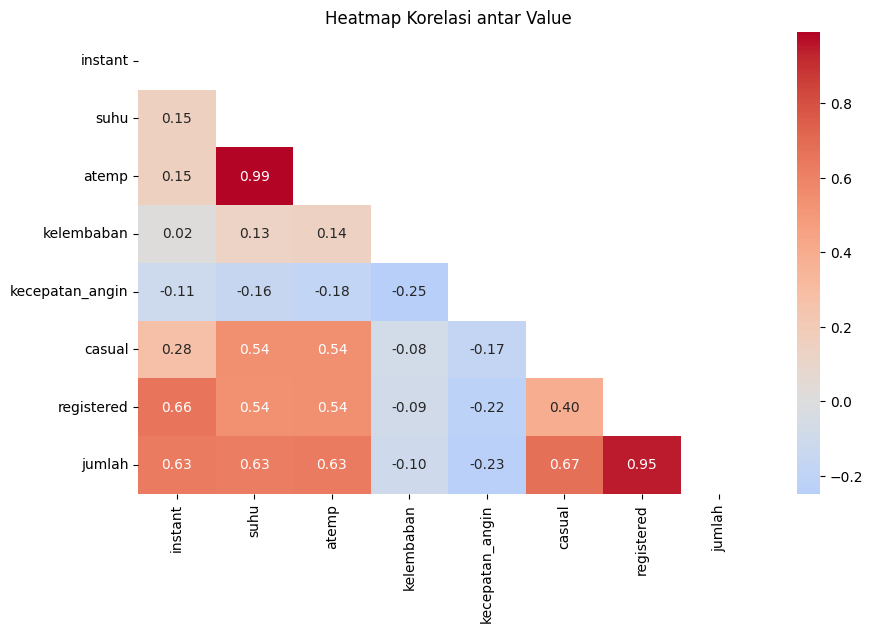

In [107]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Heatmap Korelasi antar Value")
plt.show()

Berdasarkan analisis diatas bisa ditarik kesimpulan :
- suhu berpengaruh terhadap jumlah penyewa baik yang casual(biasa) maupun pendaftar(registered)
- kelembaban tidak berpengaruh terhadap jumlah penyewa
- kecepatan angin juga tidak berpengaruh terhadap jumlah penyewa
- casual(penyewa biasa) berkorelasi sedang dengan registered(terdaftar)
- jumlah penyewa sangat berkorelasi dengan suhu, casual, dan registered (0.63, 0.67, dan 0.95), dan sedikit negatif dengan kelembaban (-0.10).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah cuaca berpengaruh terdahap jumlah penyewa sepeda?

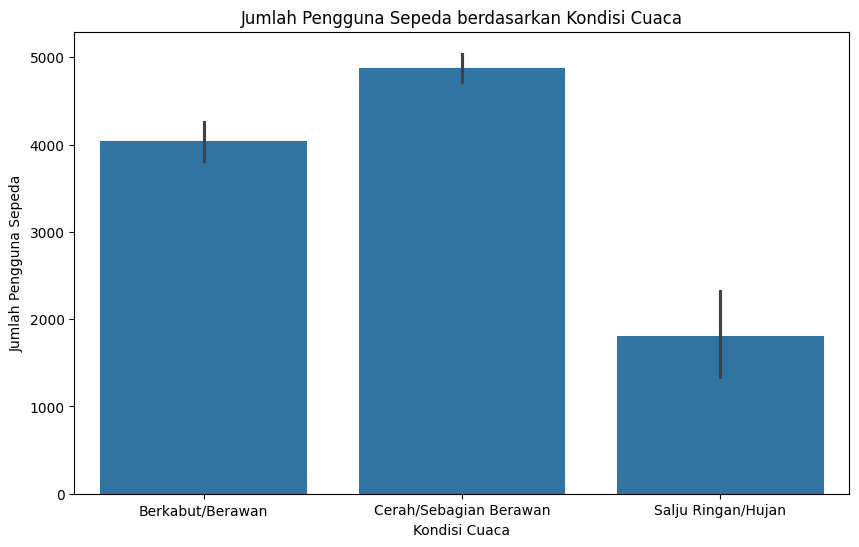

In [108]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='kondisi_cuaca',
    y='jumlah',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Berdasarkan visualiasi diatas, dapat disimpulkan bahwa penyewa lebih menyukai menyewa sepeda pada cuaca cerah/sebagian berawan dibanding kedua kondisi cuaca yang lain

### Pertanyaan 2: Bagaimana korelasi antara variabel cuaca seperti suhu, kelembaban, kecepatan angin dengan jumlah penyewaan sepeda?**bold text**

Text(0.5, 1.0, 'Korelasi kelembaban dengan jumlah penyewa')

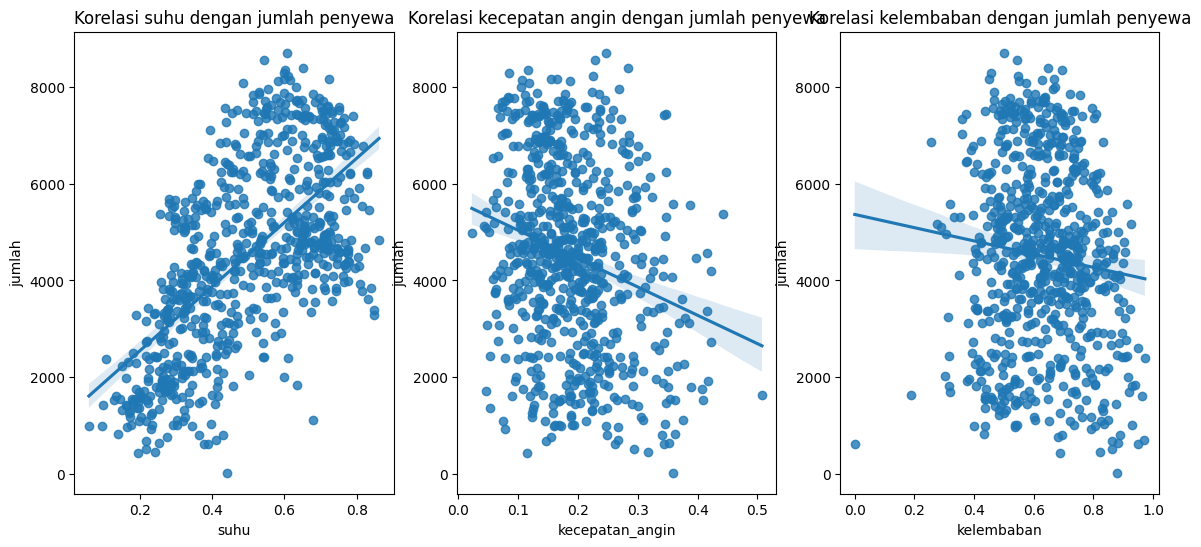

In [112]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.regplot(
    x='suhu',
    y='jumlah',
    data=day_df,
)
plt.title('Korelasi suhu dengan jumlah penyewa')

plt.subplot(1, 3, 2)
sns.regplot(
    x='kecepatan_angin',
    y='jumlah',
    data=day_df,
)
plt.title('Korelasi kecepatan angin dengan jumlah penyewa')

plt.subplot(1, 3, 3)
sns.regplot(
    x='kelembaban',
    y='jumlah',
    data=day_df,
)
plt.title('Korelasi kelembaban dengan jumlah penyewa')

Hasil regplot diatas menunjukkan:

- korelasi suhu dan jumlah penyewa ternyata menunjukan korelasi yang positif diantara dua variabel.
- korelasi kecepatan angin dan jumlah penyewa menunjukan korelasi yang negatif diantara dua variabel.
- korelasi kelembaban dan jumlah penyewa menunjukan korelasi yang positif diantara dua variabel.

Dari tiga pernyataan tersebut dapat disimpulkan bahwa jika suhu naik maka jumlah penyewa akan naik, kemudian jika kecepatan angin dan kelembaban naik maka akan mengurangi jumlah penyewa walaupun dalam kasus kelembaban korelasi antara kelembaban dan jumlah penyewa tidak terlalu berpengaruh.

### Pertanyaan 3: Apakah terdapat perbedaan pola penyewaan sepeda antara musim semi, musim panas, musim gugur, dan musim dingin?

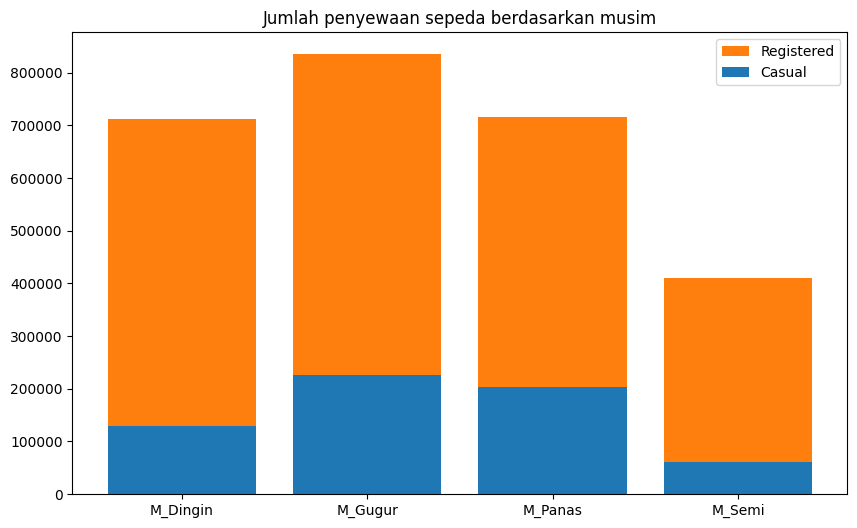

In [118]:
musiman = day_df.groupby('musim')[['registered','casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat
plt.bar(
    musiman['musim'],
    musiman['registered'],
    label='Registered',
    color='tab:orange'
)

plt.bar(
    musiman['musim'],
    musiman['casual'],
    label='Casual',
    color='tab:blue'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

Dari visualisasi diatas dapat disimpulkan bahwa musim sangat mempengaruhi pola penyewaan baik dari penyewa casual dan registered. Musim gugur menempati urutan teratas dalam jumlah penyewaan diikuti musim panas, dingin dan diurutan terakhir ditempati musim semi.

## Conclusion

- Conclution pertanyaan 1: Penyewa cenderung menyewa sepeda saat cuaca cerah/sebagian berawan (5000 penyewa) dan berkabut/berawan (4000 penyewa) dibanding saat cuaca sedang salju ringan/hutan (2000 penyewa) dan cuaca buruk (0 penyewa).
- Conclution pertanyaan 2: Disimpulkan bahwa suhu memiliki korelasi positif dengan jumlah penyewa, sehingga jika suhu meningkat, maka penyewa sepeda juga cenderung meningkat. Sebaliknya dengan kecepatan angin dan kelembaban yang memiliki korelasi negatif dengan jumlah penyewa, hal tersebut dapat menurunkan jumlah pengguna sepeda ketika kecepatan angin dan kelembaban meningkat
- Conclution pertanyaan 3: Pada visualisasi yang ketiga dapat disimpulkan bahwa musim yang paling minim jumlah penyewa sepeda adalah musin semi. Hal ini bisa diakibatkan oleh banyak faktor seperti kondisi cuaca, temperatur udara dan lain-lain. Untuk musim paling penyewa favoritkan adalah musim gugur dimana suhu, kecepatan angin, dan kelembaban berada pada kondisi moderat (sedang).

In [120]:
day_df.to_csv("daya_data.csv", index=False)